<a href="https://colab.research.google.com/github/walkerjian/hello-vorlt/blob/master/kalman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

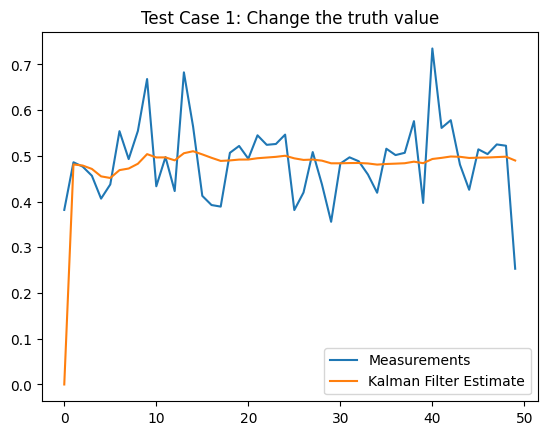

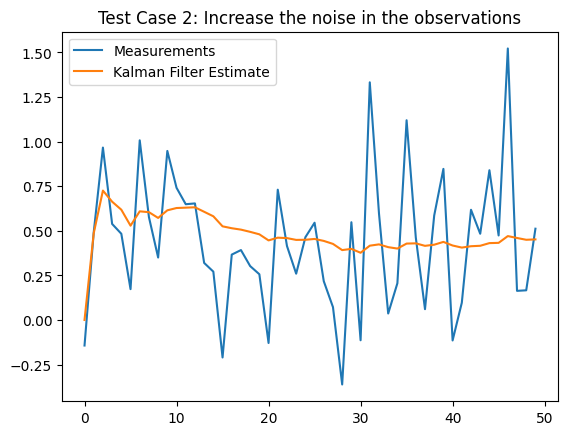

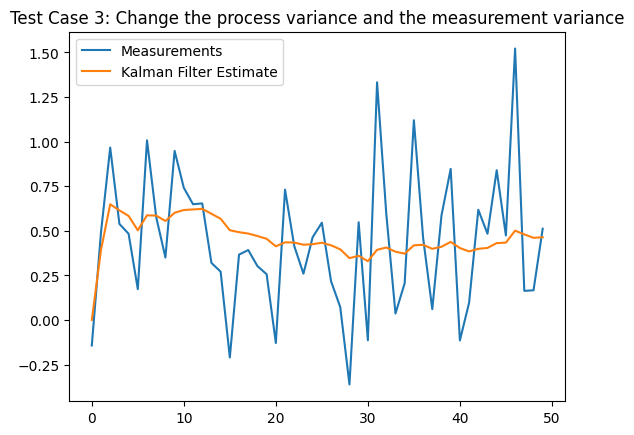

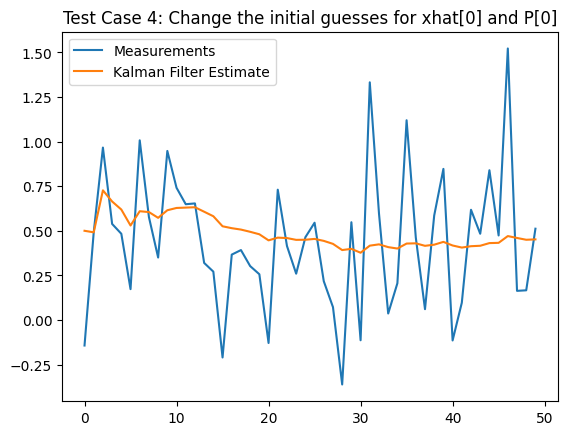

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kalman_filter(z, x, Q, R, xhat_initial, P_initial):
    # Number of iterations for the filter
    n_iter = len(z)

    # Size of the array, in this case, it's the number of iterations
    sz = (n_iter,)

    # Allocate space for arrays
    xhat = np.zeros(sz) # a posteriori estimate of x
    P = np.zeros(sz) # a posteriori error estimate
    xhatminus = np.zeros(sz) # a priori estimate of x
    Pminus = np.zeros(sz) # a priori error estimate
    K = np.zeros(sz) # gain or blending factor

    # Initial guesses for x and P
    xhat[0] = xhat_initial
    P[0] = P_initial

    for k in range(1, n_iter):
        # Time update (prediction step)
        # Project the state ahead using the prior state estimate
        xhatminus[k] = xhat[k-1]
        # Project the error covariance ahead
        Pminus[k] = P[k-1] + Q

        # Measurement update (correction step)
        # Compute the Kalman gain
        K[k] = Pminus[k] / (Pminus[k] + R)
        # Update the estimate using the measurement
        xhat[k] = xhatminus[k] + K[k] * (z[k] - xhatminus[k])
        # Update the error covariance
        P[k] = (1 - K[k]) * Pminus[k]

    return xhat

# Test Case 1: Change the truth value
x = 0.5
z = np.random.normal(x, 0.1, size=50)
xhat = kalman_filter(z, x, 1e-5, 0.1**2, 0.0, 1.0)
plt.figure()
plt.plot(z, label='Measurements')
plt.plot(xhat, label='Kalman Filter Estimate')
plt.legend()
plt.title('Test Case 1: Change the truth value')
plt.show()

# Test Case 2: Increase the noise in the observations
z = np.random.normal(x, 0.5, size=50)
xhat = kalman_filter(z, x, 1e-5, 0.1**2, 0.0, 1.0)
plt.figure()
plt.plot(z, label='Measurements')
plt.plot(xhat, label='Kalman Filter Estimate')
plt.legend()
plt.title('Test Case 2: Increase the noise in the observations')
plt.show()

# Test Case 3: Change the process variance and the measurement variance
xhat = kalman_filter(z, x, 1e-3, 0.5**2, 0.0, 1.0)
plt.figure()
plt.plot(z, label='Measurements')
plt.plot(xhat, label='Kalman Filter Estimate')
plt.legend()
plt.title('Test Case 3: Change the process variance and the measurement variance')
plt.show()

# Test Case 4: Change the initial guesses for xhat[0] and P[0]
xhat = kalman_filter(z, x, 1e-5, 0.1**2, 0.5, 0.5)
plt.figure()
plt.plot(z, label='Measurements')
plt.plot(xhat, label='Kalman Filter Estimate')
plt.legend()
plt.title('Test Case 4: Change the initial guesses for xhat[0] and P[0]')
plt.show()
